## **Homework 03 - Custom CNNs**

GitHub Link : https://github.com/jyanimaulik/Deep-Learning/tree/main/Homework%203

Step 1. Create your custom dataset featuring 3 custom categories of at least 100 images each



In [1]:
!pip install torch torchvision

#### Import pytorch and other libraries

In [3]:
import os
import torch
import shutil
from torch.utils.data import Dataset, DataLoader
from torchvision.io import read_image
from torchvision.transforms import Compose, Resize, ToTensor, transforms
from torchvision.transforms.functional import to_pil_image
from torchvision import transforms
import torchvision
import torch.nn as nn
import torch.optim as optim
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
# created custom dataset using fruit images of 3 categories i.e. strawberry, peach, pomegranate

class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.classes = os.listdir(root_dir)
        self.images = []
        for index, _class in enumerate(self.classes):
            class_path = os.path.join(root_dir, _class)
            self.images += [(os.path.join(class_path, img), index) for img in os.listdir(class_path)]

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path, label = self.images[idx]
        image = read_image(img_path)  # This returns a tensor
        image = to_pil_image(image)  # Convert tensor to PIL Image
        if self.transform:
            image = self.transform(image)
        return image, label


In [5]:
# transformation
transform = Compose([
    Resize((128, 128)),
    ToTensor(),
])

In [7]:
# Load the data

dataset = CustomDataset(root_dir='fruits/', transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [8]:
import pathlib
data_dir = "fruits/"
data_dir = pathlib.Path(data_dir)
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

811


The dataset is of fruit having three type of fruits
1. peach
2. pomegranate
3. strawberry

The total record count of image in this dataset is 811

Some Peaches Images

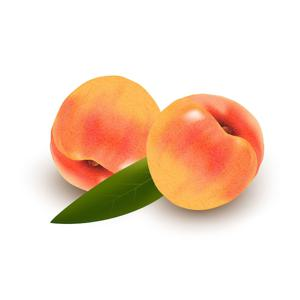

In [9]:
peaches = list(data_dir.glob('peaches/*'))
PIL.Image.open(str(peaches[0]))

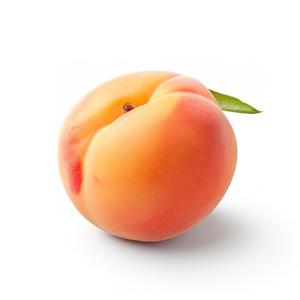

In [10]:
PIL.Image.open(str(peaches[1]))

Some Pomegranate Images

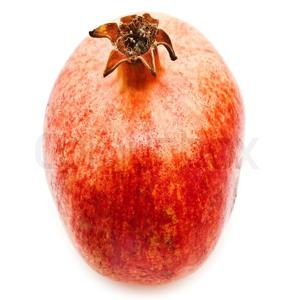

In [12]:
pomegranate = list(data_dir.glob('pomegranates/*'))
PIL.Image.open(str(pomegranate[0]))

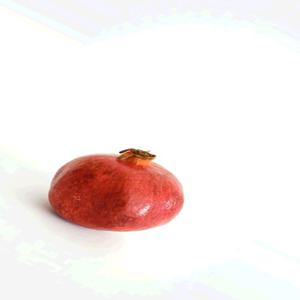

In [14]:
PIL.Image.open(str(pomegranate[1]))

Some Strawberry Images

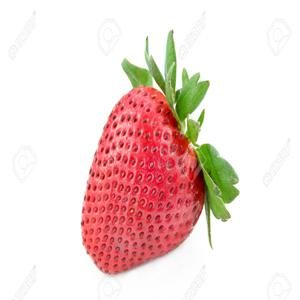

In [15]:
strawberry = list(data_dir.glob('strawberries/*'))
PIL.Image.open(str(strawberry[0]))

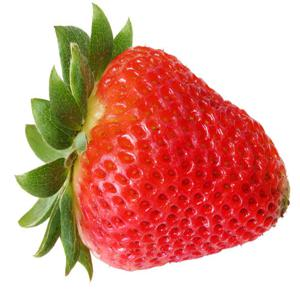

In [16]:
PIL.Image.open(str(strawberry[1]))

## Step 2. Split this data between 80% training and 20% test



In [17]:
original_data_dir = 'fruits/'
split_data_dir = 'fruits_split/'

# split_data_dir structure
os.makedirs(split_data_dir, exist_ok=True)

# categories
categories = [d for d in os.listdir(original_data_dir) if os.path.isdir(os.path.join(original_data_dir, d))]

# split each category
for category in categories:

    # paths for original category images
    category_path = os.path.join(original_data_dir, category)
    images = [img for img in os.listdir(category_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]

    if len(images) > 0:

        # Spliting the data into 80% train, 20% test
        train_imgs, test_imgs = train_test_split(images, test_size=0.2, random_state=42)

        # copying images to the split directory
        def copy_images(imgs, dest):
            os.makedirs(dest, exist_ok=True)
            for img in imgs:
                src_path = os.path.join(category_path, img)
                dest_path = os.path.join(dest, img)
                shutil.copy(src_path, dest_path)

        # copy training  images
        train_dest = os.path.join(split_data_dir, 'train', category)
        copy_images(train_imgs, train_dest)

        # copy testing images
        test_dest = os.path.join(split_data_dir, 'test', category)
        copy_images(test_imgs, test_dest)
    else:
        print(f"No images found in category {category}, skipping...")

No images found in category .ipynb_checkpoints, skipping...


## Step 3. Preprocess the data as you see fit



In [18]:
# Define your transformations
transformations = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [19]:
train_dataset = CustomDataset(root_dir='fruits_split/train', transform=transformations)
test_dataset = CustomDataset(root_dir='fruits_split/test', transform=transformations)

In [20]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


### Visualize the data

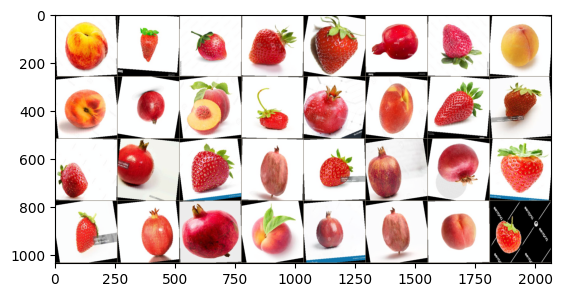

In [21]:
# function to show an images after transformation
def imshow(img):
    img = img.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img = std * img + mean
    img = np.clip(img, 0, 1)
    plt.imshow(img)
    plt.show()

# Get the batch of training data
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))

In [22]:
# class names
class_names = ['Peach', 'Pomegranate', 'Strawberry']

The 10 images from the training dataset

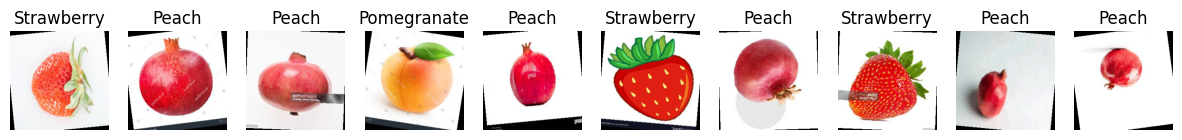

In [23]:
# function to show the images with labels of each image
def show_images_with_labels(images, labels):
    # Number of images
    num_images = len(images)

    # Convert labels to class names
    labels = [class_names[label] for label in labels.numpy()]

    fig, axs = plt.subplots(1, num_images, figsize=(15, num_images * 3))

    for i, (img, label) in enumerate(zip(images, labels)):
        img = img.numpy().transpose((1, 2, 0))  # Converting from tensor image
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        img = std * img + mean
        img = np.clip(img, 0, 1)

        # Plot image
        if num_images == 1:
            ax = axs
        else:
            ax = axs[i]
        ax.imshow(img)
        ax.set_title(label)
        ax.axis('off')

    plt.show()

# Get the batch of training data
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Display a few images with labels
show_images_with_labels(images[:10], labels[:10])

### Step 4 & 5. Create a Convolutional Neural Network model to learn about your training set. Make predictions on the test data and compare them to the expected categories



Creation of Convolutional Neural Network model


In [24]:
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=3):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 64 * 64, 512)
        self.fc2 = nn.Linear(512, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 64 * 64)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [25]:
model = SimpleCNN(num_classes=3)    # Initializing the model
criterion = nn.CrossEntropyLoss()      # Loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)    # Optimizer

In [26]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

#### Training the model

In [27]:
num_epochs = 5  # Number of epochs to train

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    for images, labels in train_loader:
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader)}')


Epoch [1/5], Loss: 11.322637092499505
Epoch [2/5], Loss: 0.5949847187314715
Epoch [3/5], Loss: 0.31946856031815213
Epoch [4/5], Loss: 0.30357902000347775
Epoch [5/5], Loss: 0.2197656205722264


#### Evaluating the model

In [29]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy of the model on the test images: {100 * correct / total}%')

Accuracy of the model on the test images: 86.50306748466258%


### Step 6: Use GoogleNet(InceptionNet) and add a LinearLayer on top of it.



In [42]:
import torch
import torch.nn as nn
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.Resize(299),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

train_dataset = datasets.ImageFolder(root='fruits_split/', transform=transform)
test_dataset = datasets.ImageFolder(root='fruits_split/', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [43]:
num_classes = 3

googlenet = models.googlenet(pretrained=True)

# freezing all parameters as we only training the final layer.
for param in googlenet.parameters():
    param.requires_grad = False

googlenet.fc = nn.Linear(googlenet.fc.in_features, num_classes) # Adding Linear layer

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth
100%|██████████| 49.7M/49.7M [00:01<00:00, 32.7MB/s]


### Step 7: Train the GoogleNet model and compare the accuracy with the first model.



#### Model Training

In [44]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(googlenet.fc.parameters(), lr=0.001)

num_epochs = 5

for epoch in range(num_epochs):
    googlenet.train()
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    for inputs, labels in train_loader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = googlenet(inputs)
        loss = criterion(outputs, labels)

        # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_predictions += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

        # Backward and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate the average loss and accuracy over the epoch
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = (correct_predictions / total_predictions) * 100

    # Print the loss and accuracy
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%')

Epoch 1/5, Loss: 0.5826, Accuracy: 78.30%
Epoch 2/5, Loss: 0.5057, Accuracy: 79.90%
Epoch 3/5, Loss: 0.5157, Accuracy: 79.90%
Epoch 4/5, Loss: 0.4970, Accuracy: 79.90%
Epoch 5/5, Loss: 0.4845, Accuracy: 79.90%


#### Model Evaluation

In [46]:
# Model Evalution

googlenet.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = googlenet(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: {100 * correct / total}%')


Accuracy on test set: 79.90135635018495%


#### Test Prediction

In [48]:
# Prediction

from PIL import Image
import torchvision.transforms as transforms
import torch
import torch.nn.functional as F
import numpy as np

img_height = 299
img_width = 299
img_path = 'fruits/pomegranates/fresh_pomegranate_104.jpg'

# loading the image
img = Image.open(img_path).convert('RGB')

# define the transformation
transform = transforms.Compose([
    transforms.Resize((img_height, img_width)),
    transforms.ToTensor(),
])

# apply the transformation to the image
img_tensor = transform(img)

# Add an extra dimension for the batch size
img_tensor = img_tensor.unsqueeze(0)

with torch.no_grad():
    inputs = img_tensor
    outputs = googlenet(inputs)
    _, predicted = torch.max(outputs, 1)

    score = F.softmax(predicted[0].float(), dim=-1)
    score = score.cpu().detach().numpy()

    print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[predicted[0]], 100 * np.max(score))
    )

This image most likely belongs to Pomegranate with a 100.00 percent confidence.


### **Conclusion**

The best performance of the custom CNN model (86.50% accuracy) over GoogleNet (79.90%) on a fruits dataset illustrates that model complexity does not guarantee better results.

This comparison underscores the importance of model suitability, tuning, and adaptation to the task at hand.

Despite its complexity, GoogleNet was outperformed by a simpler custom CNN model, showing that a model's fit to the specific data and task matters more than its complexity.

This result highlights the need for carefully choosing and tuning models based on the dataset's unique features to achieve the best performance.
